<a href="https://colab.research.google.com/github/AjiAryaDewangga/CNN_faceRecognition/blob/main/NEW_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import Library**

In [2]:
#!pip uninstall seaborn
#!pip install seaborn==0.11

import tensorflow as tf
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import seaborn as sns
import gc 
import pandas as pd
sns.__version__

'0.11.0'

### **Load Data**

In [3]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/dataset/')
Train = glob.glob('/content/drive/MyDrive/Colab Notebooks/dataset/data train/*')
Val=glob.glob('/content/drive/MyDrive/Colab Notebooks/dataset/data_validasi/*')
#Test=glob.glob('/content/drive/My Drive/Colab Notebooks/DATA RD/DATASETS/Data Split/Test/*')

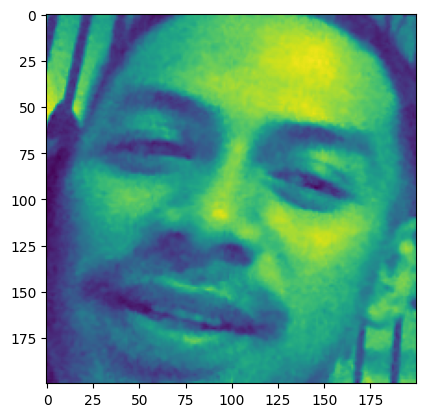

In [4]:
for ima in Train[200:201]:
     img=mpimg.imread(ima)
     imgplot = plt.imshow(img)
     plt.show()

### **Data Preparation**

In [5]:
nrows = 200
ncolumns = 200
channels = 3  

def read_and_process_image(list_of_images):
    
    X = [] # images
    y = [] # labels
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))  #Read the image
        #get the labels
        if 'Sample1' in image:
            y.append(0)
        elif 'Sample5' in image:
            y.append(1)
        elif 'Sample6' in image:
            y.append(2)
        elif 'Sample7' in image:
            y.append(3)

 
    
    return X, y

In [6]:
X_train, y_train = read_and_process_image(Train)
X_val, y_val = read_and_process_image(Val)
#X_test, y_test = read_and_process_image(Test)

In [7]:
gc.collect()

#Convert list to numpy array
X_train = np.array(X_train)
y_train= np.array(y_train)

X_val = np.array(X_val)
y_val= np.array(y_val)

"""
X_test = np.array(X_test)
y_test= np.array(y_test)
"""
print('Train:',X_train.shape,y_train.shape)
print('Val:',X_val.shape,y_val.shape)
#print('Test',X_test.shape,y_test.shape)

Train: (400, 200, 200, 3) (400,)
Val: (80, 200, 200, 3) (80,)


/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total Data Training')

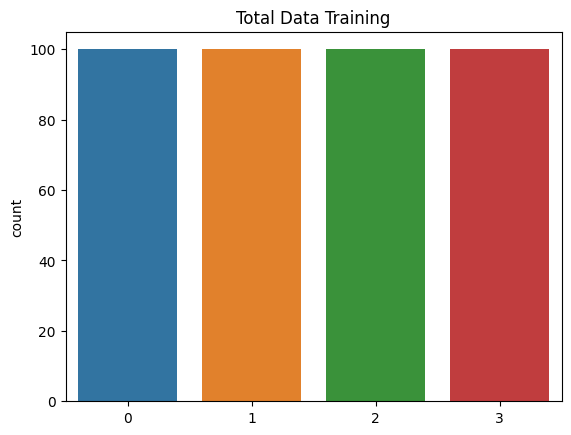

In [8]:
sns.countplot(y_train)
plt.title('Total Data Training')

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total Data Validasi')

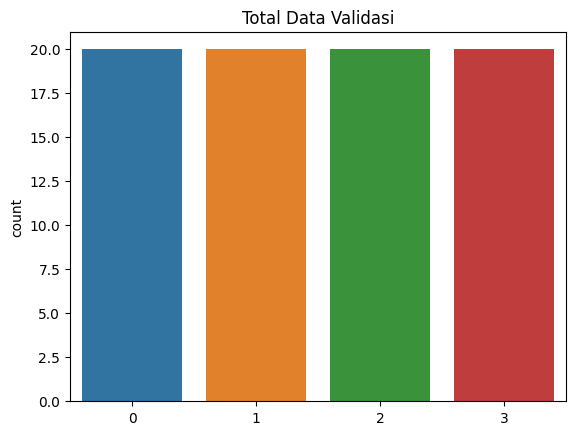

In [9]:
sns.countplot(y_val)
plt.title('Total Data Validasi')

### **Define Model**

In [10]:
IMG_SHAPE = (200, 200, 3)
model=tf.keras.models.Sequential() #model lurus kebawah tidak bercabang

# convolution
model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=7, activation='relu', input_shape=IMG_SHAPE )) #filters=36 adalah jumlah filter 36, kernel = ukuran pergeseran, relu = memposisikan nilai minus ke nol
model.add(tf.keras.layers.MaxPool2D(pool_size=2)) # sama dengan kernel tapi diambil nilai terbesar (kalau kernel dikali)
model.add(tf.keras.layers.Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= IMG_SHAPE))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Flatten()) # satu foto jadi satu baris matriks
# neural network
model.add(tf.keras.layers.Dense(1024, activation='relu')) # jadikan array (0, 2024)
model.add(tf.keras.layers.Dropout(0.5)) #dibuang yang tidak perlu
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

In [11]:
model.compile(loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=0.0001),
    metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 194, 194, 36)      5328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 97, 97, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 93, 93, 54)        48654     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 46, 54)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 114264)            0         
                                                                 
 dense (Dense)               (None, 1024)              1

In [12]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
13/13 [==============================] - 16s 152ms/step - loss: 64.1942 - accuracy: 0.3075 - val_loss: 1.2740 - val_accuracy: 0.5125
Epoch 2/100
13/13 [==============================] - 1s 72ms/step - loss: 1.2988 - accuracy: 0.4350 - val_loss: 1.2811 - val_accuracy: 0.5500
Epoch 3/100
13/13 [==============================] - 1s 72ms/step - loss: 1.2295 - accuracy: 0.5225 - val_loss: 1.2051 - val_accuracy: 0.5875
Epoch 4/100
13/13 [==============================] - 1s 73ms/step - loss: 1.0959 - accuracy: 0.5450 - val_loss: 1.3068 - val_accuracy: 0.5500
Epoch 5/100
13/13 [==============================] - 1s 72ms/step - loss: 1.0777 - accuracy: 0.6025 - val_loss: 1.0862 - val_accuracy: 0.5875
Epoch 6/100
13/13 [==============================] - 1s 70ms/step - loss: 0.9621 - accuracy: 0.5950 - val_loss: 0.9251 - val_accuracy: 0.6750
Epoch 7/100
13/13 [==============================] - 1s 69ms/step - loss: 0.8176 - accuracy: 0.6925 - val_loss: 0.6840 - val_accuracy: 0.7125
Epo

In [13]:
scor = model.evaluate( X_val,  y_val, verbose=0)

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 2.3996
test acc 0.9125


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


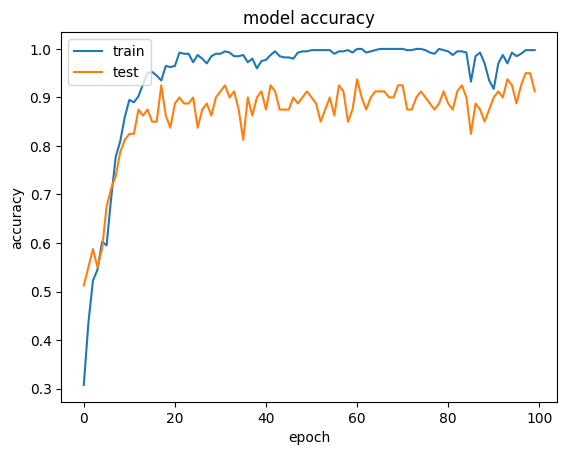

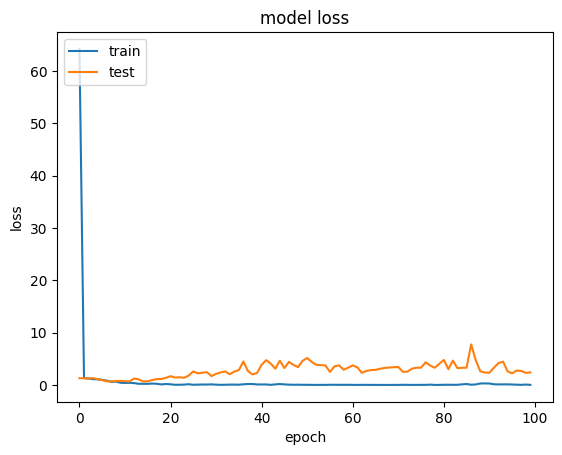

In [14]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
model.save_weights('Weight_FR_Wiw.h5') #save bobot 
#model.save('Model_FR1.h5') #seluruh model